<h1>Matplotlib - osa 3</h1>
<h2>Histogrammi</h2>

Tämä on jatkoa sarjan kahdelle edelliselle osalle:

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib1.ipynb

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib2.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Avaan datan ja näytän 5 ensimmäistä riviä
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


<h2>Histogrammi</h2>

Histogrammia käytetään määrällisen muuttujan luokitellun jakauman esittämiseen. Histogrammissa pylväät ovat kiinni toisissaan. Minulla on tapana erottaa pylväät toisistaan reunaviivalla (<b>edgecolor = 'white'</b>).

Oletuksena histogrammi jakaa muuttujan arvot kymmeneen luokkaan.

Ainakin joissain kirjastoversioissa arvoasteikon lukumääriin tulee yksi desimaali mukaan. Tämän vuoksi muotoilen arvoakselin <b>set_yticklabels()</b>-toiminnolla.

[Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '5'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '15'),
 Text(0, 0, '18'),
 Text(0, 0, '20')]

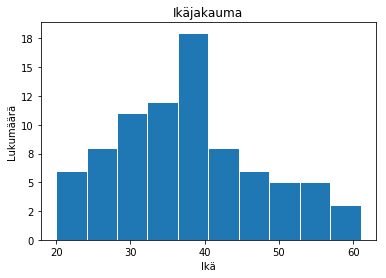

In [3]:
ax1 = df['ikä'].plot.hist(edgecolor = 'white')

ax1.set_title('Ikäjakauma')
ax1.set_ylabel('Lukumäärä')
ax1.set_xlabel('Ikä')
ax1.set_yticklabels(['{:.0f}'.format(y) for y in ax1.get_yticks()])

Seuraavassa viimeistellympi histogrammi, jossa määrään käytettäväksi kuutta luokkaa (<b>bins = 6</b>).

Lukumäärien sijasta arvoakselilla on prosentit, joiden laskemiseen käytän <b>np.ones()</b>-kikkaa:
<ul>
    <li>Annan arvoille painokertoimet <b>weights</b>-lisäparametrina.</li>
    <li><b>np.ones(n)</b> tuottaa alkuperäisten arvojen sijasta pelkkiä ykkösiä. Kun ykkösen suuruisia arvoja summataan käyttäen painokertoimina 1/n, niin saadaan prosentteja.</li>
    <li>Kertomalla sadalla saadaan desimaalimuotoiset prosentit prosenttiluvuiksi.</li>
</ul>

(0, 35)

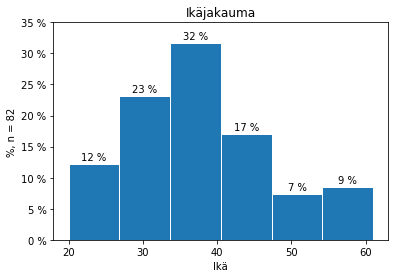

In [4]:
# Ikään liittyvien havaintojen lukumäärä
n = df['ikä'].count()

ax2 = df['ikä'].plot.hist(bins = 6, weights = np.ones(n)/n * 100, edgecolor = 'white')

ax2.set_title('Ikäjakauma')
ax2.set_ylabel('%, n = ' + str(n))
ax2.set_xlabel('Ikä')
ax2.set_yticklabels(['{:.0f} %'.format(y) for y in ax2.get_yticks()])

for bar in ax2.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = '{:.0f} %'.format(y)
    ax2.text(x = x, y = y + 0.3, s = label, va = 'bottom', ha = 'center')
ax2.set_ylim(0, 35)

Tarvittaessa voin käyttää epätasavälisiä luokkia. Tällöin määritän luokkarajat (<b>bins</b>) itse. Tässä esimerkissä ensimmäinen luokka on sisältää alarajan (1500), mutta ei ylärajaa 2000. Toinen luokka sisältää alarajan 2000, mutta ei ylärajaa 2500 jne.. Viimeinen luokka kuitenkin sisältää myös ylärajan 6500.

Havainnollisuuden parantamiseksi asetan x-akselin jakoviivat luokkarajojen kohdille (<b>ax3.set_xticks(bins)</b>).

Huomaa, että epätasavälistä luokittelua käytettäessä pylvään leveys riippuu luokan leveydestä.

(0, 40)

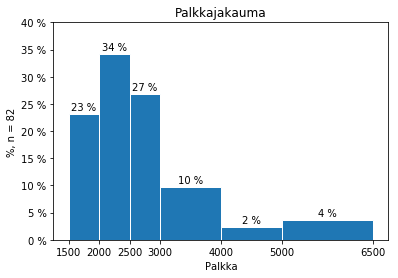

In [5]:
n = df['palkka'].count()
bins = [1500, 2000, 2500, 3000, 4000, 5000, 6500]

ax3 = df['palkka'].plot(kind = 'hist', bins = bins, weights = np.ones(n)/n * 100, edgecolor = 'white')

ax3.set_title('Palkkajakauma')
ax3.set_ylabel('%, n = ' + str(n))
ax3.set_xlabel('Palkka')
ax3.set_xticks(bins)
ax3.set_yticklabels(['{:.0f} %'.format(y) for y in ax3.get_yticks()])

for bar in ax3.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = '{:.0f} %'.format(y)
    ax3.text(x = x, y = y + 0.3, s = label, va = 'bottom', ha = 'center')
ax3.set_ylim(0, 40)

<h2>Lisätietoa</h2>

Seuraava osa https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib4.ipynb käsittelee värien ja värikarttojen käyttöä.